# _*Reinforcment Learning and Dynamic Optimization*_
## Assignment 1 (2024) - Recommending News Articles to Unknown Users
---
### Student's Info
---
##### ID : 2020030055
##### Full Name : Georgios - Marios Tsikritzakis
---

# Description

You own a web site that random users access for news. Your goal is to choose a news article to show to each user, that will maximize the chance that the user clicks on it (to read it further). This is also known as "the clickthrough rate". This is your problem setup more formally:


*   **News Articles:**
>   * When a user arrives at your site, there are a total of **𝐾 = 5**
      news articles you can choose from.
>   * If you recommend article $i$
, then there is a probability that the user clicks article $i$, which is unknown and equal to $p_{i}$.
>   * Assume you have a total of T rounds, during which you want to maximize the number of successful recommendations (i.e., clicks)

*   **Users:**
>   * For every user that visits your site, you know if they are: (i) male or   
      female, and (ii) under or over 25 years old.
>   * The "characteristics" of each new user visiting your site, are drawnin    an  IID manner (i.e., the next user has no dependence on who the previous user was).

*   **User-News Preference:**
>   * Unlike the standard bandits we've seen, it turns out that different types of users might prefer different articles!
>   * Let $p_{0}$,$p_{1}$,$p_{2}$,$p_{3}$,$p_{4}$
 denote the click probabilities for articles, 1,2,3,4,5, respectively. The taste differences are captured as follows:
 >> * female over 25 : $p_{0} = 0.8 $ , $p_{1} = 0.6 $ , $p_{2} = 0.5 $ , $p_{3} = 0.4 $ , $p_{4} = 0.2 $
 >> * male over 25 : $p_{0} = 0.2 $ , $p_{1} = 0.4 $ , $p_{2} = 0.5 $ , $p_{3} = 0.6 $ , $p_{4} = 0.8 $
 >> * male or female under 25 : $p_{0} = 0.2 $ , $p_{1} = 0.4 $ , $p_{2} = 0.8 $ , $p_{3} = 0.6 $ , $p_{4} = 0.5 $    
>   *         **NOTE: Your algorithm initially knows NEITHER the ranking of different articles (per category), NOR the exact click probabilities. It doesn't even know that males and females under 25 have similar preferences.**












# Simple modification of the UCB algorithm.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

class UCBmodification:

  def __init__(self, number_of_articles , number_of_user_types , horizon):
    self.number_of_articles = number_of_articles                           # k articles-actions-arms
    self.number_of_user_types = number_of_user_types                       # |U|
    self.horizon = horizon                                                 # T rounds
    self.estimates = np.zeros((number_of_articles, number_of_user_types))  # Estimated success(clicks) probabilities
    self.counts = np.zeros((number_of_articles, number_of_user_types))     # Number of times each article has been recommended for each group type


  def select_arm(self , user_type):
    # compute the ucb values and select-recommend the argmax article-action.
    ucb_values = np.zeros(self.number_of_articles)      # ucb values array
    T_prime = self.horizon / self.number_of_user_types  # effective horizon
    for i in range(self.number_of_articles):
      if self.counts[i, user_type] == 0:
        # If an article has not been recommended to this user type, select it, because in Ni = 0 we have infinity in the upper confident term.
        return i

      ucb_values[i] = self.estimates[i, user_type] + np.sqrt(2 * np.log(T_prime) / self.counts[i, user_type])

    # return the article number id (0-number_of_articles) with the max value
    return np.argmax(ucb_values)


  def update(self, user_type, chosen_arm, reward):
      # Update estimates and counts for the chosen arm and user type
      self.counts[chosen_arm, user_type] += 1
      n = self.counts[chosen_arm, user_type]
      self.estimates[chosen_arm, user_type] = (self.estimates[chosen_arm, user_type] * (n - 1) + reward ) / n


### To simulate the UCB modification , run the beneath code cell.


For group Females>25:
article = 1: true mean = 0.800000 : sample mean = 0.757812
article = 2: true mean = 0.600000 : sample mean = 0.347826
article = 3: true mean = 0.500000 : sample mean = 0.614035
article = 4: true mean = 0.400000 : sample mean = 0.375000
article = 5: true mean = 0.200000 : sample mean = 0.142857

For group Males>25:
article = 1: true mean = 0.200000 : sample mean = 0.235294
article = 2: true mean = 0.400000 : sample mean = 0.363636
article = 3: true mean = 0.500000 : sample mean = 0.577778
article = 4: true mean = 0.600000 : sample mean = 0.586957
article = 5: true mean = 0.800000 : sample mean = 0.773913

For group Males<25:
article = 1: true mean = 0.200000 : sample mean = 0.360000
article = 2: true mean = 0.400000 : sample mean = 0.187500
article = 3: true mean = 0.800000 : sample mean = 0.790419
article = 4: true mean = 0.600000 : sample mean = 0.470588
article = 5: true mean = 0.500000 : sample mean = 0.360000

For group Females<25:
article = 1: true mean = 0.

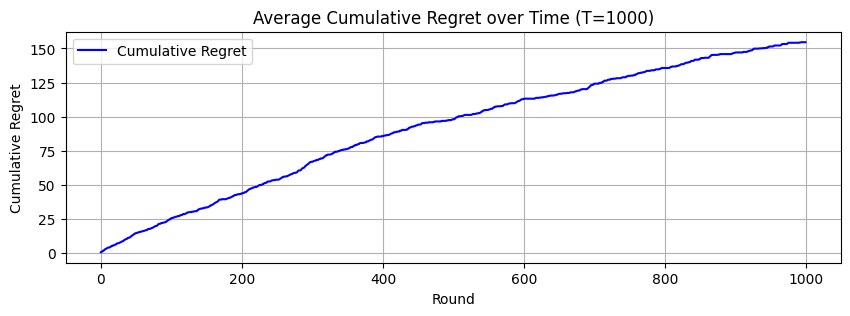

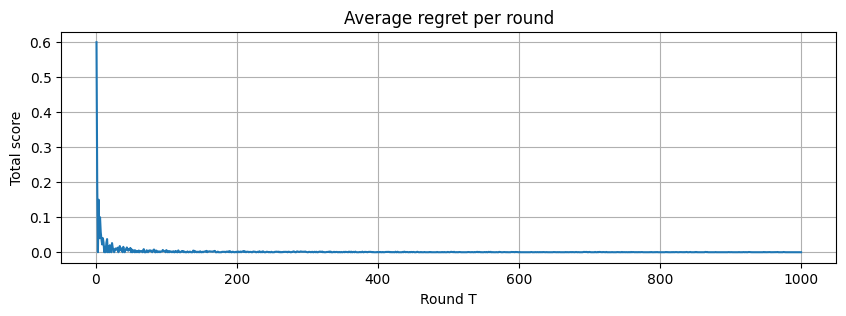

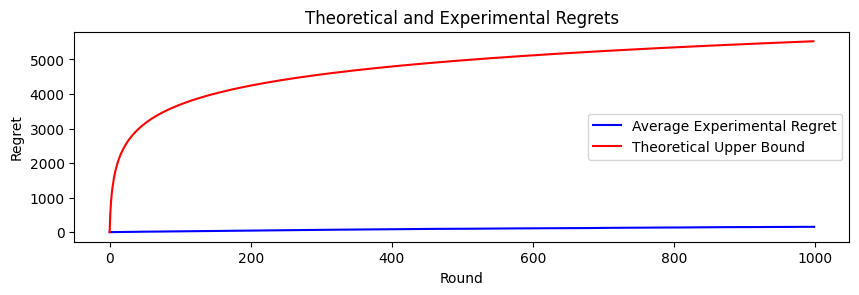

In [22]:
# Constants-Environment setup:
K = 5  # Number of articles-actions-arms
N_USER_TYPES = 4  # Number of user types ( Females>25 , Males>25 , Males<25 , Females<25) id=0,1,2,3 respectively
HORIZON = 1000

# Success probabilities(bandits) for each article-user type combination
success_probs = np.array([
    # 4 columns , 5 rows. Column identify the user type(0-3 id) , row identify the article number(0-4)
    [0.8, 0.2, 0.2, 0.2],  # Article 1
    [0.6, 0.4, 0.4, 0.4],  # Article 2
    [0.5, 0.5, 0.8, 0.8],  # Article 3
    [0.4, 0.6, 0.6, 0.6],  # Article 4
    [0.2, 0.8, 0.5, 0.5]   # Article 5
])

# used only for printing reasons.
dict = {
    0 : "Females>25",
    1 : "Males>25",
    2 : "Males<25",
    3 : "Females<25"
}

def simulation(articles , user_types , T , true_click_probabilities):

  ucb_user_pref = UCBmodification(number_of_articles = articles, number_of_user_types = user_types , horizon = T)
  total_reward = 0
  regrets = []
  regret_per_round = []

  for t in range(T):
    # Generate randomly a user type between 0 - user_types - 1 (inclusive)
    user_type = np.random.randint(user_types)
    # Select article using UCB for the given user type
    recommended_article = ucb_user_pref.select_arm(user_type)
    # Simulate click based on true click probabilities!
    click_prob = true_click_probabilities[recommended_article, user_type]
    reward = np.random.binomial( 1 , p = click_prob)

    # Update estimates and counts
    ucb_user_pref.update(user_type, recommended_article , reward)
    # Accumulate rewards
    total_reward += reward
    # Calculate average regret:
    average_regret = np.max(true_click_probabilities[:, user_type]) - true_click_probabilities[recommended_article, user_type] # E[regret]= mu* -mu_alg
    # Calculate cummulative average regret
    regrets.append(average_regret)
    #regrets.append(1 - reward) # For the true regret , not the expected one , use this.
    # Calculate the average cumulative regret per round.
    regret_per_round += [regrets[t] / (t + 1) ]

  show_estimation(ucb_user_pref.estimates , true_click_probabilities)
  return total_reward, np.cumsum(regrets) , regret_per_round


def show_estimation(estimates , true_values):

  for type in range(N_USER_TYPES):
    print(f"\nFor group {dict[type]}:")
    for article in range(K):
      print('article = %d: true mean = %f : sample mean = %f' % (article + 1 , true_values[article , type] , estimates[article , type] ))


if __name__ == '__main__':
  rew , cumsum , regret_per_round = simulation(K , N_USER_TYPES , HORIZON , success_probs )

  # Plotting

  # Plot Cumulative Regret
  plt.figure(figsize=(10, 3))
  plt.plot(cumsum, label='Cumulative Regret', color='blue')
  plt.xlabel('Round')
  plt.ylabel('Cumulative Regret')
  plt.title(f'Average Cumulative Regret over Time (T={HORIZON})')
  plt.grid(True)
  plt.legend()


  # Plot the cumulative regret per round
  plt.figure(figsize=(10, 3))
  plt.title("Average regret per round")
  plt.xlabel("Round T")
  plt.ylabel("Total score")
  plt.plot(np.arange(1, HORIZON+1 ),regret_per_round)
  plt.grid(True)


  # Plot theoretic upper bound with experimental bound also.
  plt.figure(figsize=(10, 6))
  '''
  E[Regret] <= |U| * Σ_κ (8logT/Δiu) where u is the group with the maximum regret.
  We can bound it further:
  E[Regret] <= |U| * Σ_κ (8logT/0.2) where 0.2 is the min suboptimallity such that , to max the regret.
             = |U| * k * 40logT
  '''
  theoretic_regret = [N_USER_TYPES * K * 40 *  np.log(t) for t in range(1 , HORIZON)]

  plt.subplot(2, 1, 2)
  # Plotting the first graph
  plt.plot(cumsum , label='Average Experimental Regret', color='blue', linestyle='-')

  # Plotting the second graph
  plt.plot(theoretic_regret, label='Theoretical Upper Bound', color='red', linestyle='-')

  # Adding a legend
  plt.legend()

  # Adding labels and title
  plt.xlabel('Round')
  plt.ylabel('Regret')
  plt.title('Theoretical and Experimental Regrets')

  # Showing the plots
  plt.show()


